# Classical Machine Learning Demo (Regression)

This notebook demonstrates a **typical classical machine learning workflow** in a Jupyter notebook.

We use a standard dataset from scikit-learn (**Diabetes** dataset) to show:
- loading data
- train/test split
- a simple baseline
- training models (Linear Regression + Random Forest)
- evaluation (MAE / RMSE)

This is a warm-up before the RUL/SOX project. The workflow is the same.

## 1) Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Imports OK')

Imports OK


## 2) Load dataset

The Diabetes dataset is a small regression dataset that comes with scikit-learn.
It contains 10 numerical features and a continuous target.

We will predict the target value (a number).

In [7]:
data = load_diabetes(as_frame=True)
X = data.data
y = data.target

print('X shape:', X.shape)
print('y shape:', y.shape)
X.head()

X shape: (442, 10)
y shape: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Quick look at the target

In [10]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

## 3) Train / Test split

We train on the training set and evaluate on the test set to estimate performance on unseen data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Train:', X_train.shape, y_train.shape)
print('Test :', X_test.shape, y_test.shape)

Train: (353, 10) (353,)
Test : (89, 10) (89,)


## 4) Baseline model

A baseline answers: **Is our ML model better than a trivial guess?**

Baseline here: predict the **mean** of the training targets for every test sample.

In [20]:
y_pred_baseline = np.full(len(y_test), y_train.mean())

baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_rmse = mean_squared_error(y_test, y_pred_baseline)

print(f'Baseline MAE : {baseline_mae:.2f}')
print(f'Baseline RMSE: {baseline_rmse:.2f}')

Baseline MAE : 64.01
Baseline RMSE: 5361.53


## 5) Model 1 — Linear Regression (with scaling)

Many classical models benefit from feature scaling.
We use a **Pipeline** to avoid leakage: the scaler is fit only on training data.

In [23]:
linreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr)

print(f'LinearReg MAE : {lr_mae:.2f}')
print(f'LinearReg RMSE: {lr_rmse:.2f}')

LinearReg MAE : 42.79
LinearReg RMSE: 2900.19


### Visual check: True vs Predicted (Linear Regression)

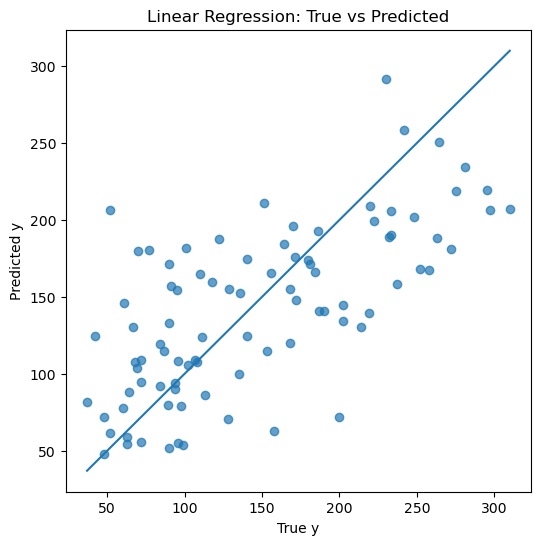

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Linear Regression: True vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

## 6) Model 2 — Random Forest Regressor

Random Forest is a strong classical model that can capture nonlinear relationships.
It usually does not require feature scaling.

In [31]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf)

print(f'RandomForest MAE : {rf_mae:.2f}')
print(f'RandomForest RMSE: {rf_rmse:.2f}')

RandomForest MAE : 44.28
RandomForest RMSE: 2966.02


## 7) Compare results

In [34]:
results = pd.DataFrame([
    {'Model': 'Baseline (mean)', 'MAE': baseline_mae, 'RMSE': baseline_rmse},
    {'Model': 'Linear Regression', 'MAE': lr_mae, 'RMSE': lr_rmse},
    {'Model': 'Random Forest', 'MAE': rf_mae, 'RMSE': rf_rmse},
]).sort_values('RMSE')

results

,Model,MAE,RMSE
1,Linear Regression,42.794095,2900.193628
2,Random Forest,44.276124,2966.024198
0,Baseline (mean),64.006461,5361.533457


## 8) Takeaways

- Always start with a **baseline**.
- Use a **train/test split** to estimate generalization.
- Pipelines help avoid data leakage when preprocessing is needed.
- Tree-based models can capture nonlinear patterns.

In the RUL/SOX project, you'll apply the same workflow to **time-series windows** and engineered features.